In [8]:
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt

In [48]:
def linearize_srgb(image: np.ndarray) -> np.ndarray:
    out = np.copy(image)
    under_threshold = image <= 0.04045
    over_threshold = np.logical_not(under_threshold)
    out[under_threshold] /= 12.92
    out[over_threshold] = np.power((image[over_threshold] + 0.055) / 1.055, 2.4)
    return out

def rgb_to_srgb(image: np.ndarray) -> np.ndarray:
    out = np.copy(image)
    under_threshold = image <= 0.0031308
    over_threshold = np.logical_not(under_threshold)
    
    out[under_threshold] *= 12.92
    out[over_threshold] = np.power(1.055 * image[over_threshold], 1 / 2.4) - 0.055

    return out

# implements the greyworld algorithm as presented in "Color Constancy" (see paper reference "EbnerConstancy")
def greyWorld(image: Image.Image) -> Image.Image:
    floatImage = np.array(image, dtype=np.float32) / 255.0

    floatImage = linearize_srgb(floatImage)

    estimated_illumination = np.mean(floatImage, axis=(0,1))
    floatImage /= estimated_illumination

    # we rescale such that the top five percent of pixel values are clipped (in one of the channels)
    percentile = np.max(np.percentile(floatImage, 95, axis=(0,1)))
    floatImage /= percentile
    floatImage = np.clip(floatImage, 0, 1)

    floatImage = rgb_to_srgb(floatImage)

    out_image_np = np.array(floatImage * 255, dtype=np.ubyte)
    return Image.fromarray(out_image_np)


In [36]:
img = Image.open("../../data/17flowers/jpg/image_0001.jpg")

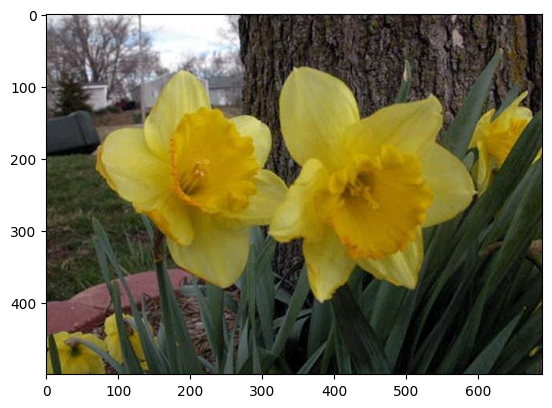

In [49]:
plt.imshow(img)

In [50]:
greyWorldImage = greyWorld(img)

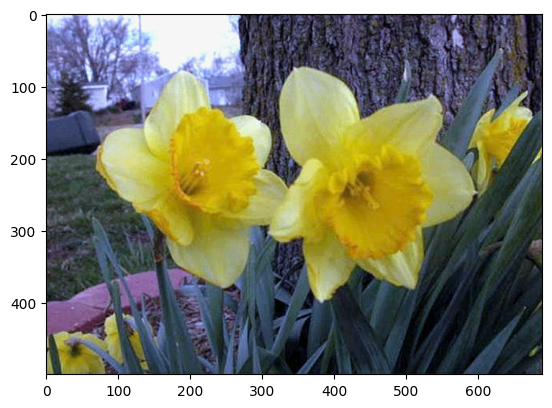

In [51]:
plt.imshow(greyWorldImage)